 # Kate Harrigan Certificate in Introductory Analytics Final Exam Notebook

In [369]:
# Import libraries and packages
import pandas as pd # Data analytics and manipulation
import numpy as np # for array processing
import requests #for API data extraction
import matplotlib.pyplot as plt #data vidualization library
import seaborn as sns #data visualization library



# Data Overview

In [373]:
#Import .csv dataset
gdr_df = pd.read_csv(r'Documents/UCD_Data_Analytics_Course_Information/glassdoor_reviews.csv', index_col = False)

In [374]:
#Data info: 838566 entries, 17 columns
gdr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838566 entries, 0 to 838565
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   firm                 838566 non-null  object 
 1   date_review          838566 non-null  object 
 2   job_title            838566 non-null  object 
 3   current              838566 non-null  object 
 4   location             541228 non-null  object 
 5   overall_rating       838566 non-null  int64  
 6   work_life_balance    688672 non-null  float64
 7   culture_values       647193 non-null  float64
 8   diversity_inclusion  136066 non-null  float64
 9   career_opp           691065 non-null  float64
 10  comp_benefits        688484 non-null  float64
 11  senior_mgmt          682690 non-null  float64
 12  recommend            838566 non-null  object 
 13  ceo_approv           838566 non-null  object 
 14  outlook              838566 non-null  object 
 15  headline         

In [377]:
#Displays the first 5 rows of the dataset
gdr_df.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [281]:
gdr_df.describe()

,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
count,838566.000000,688672.000000,647193.000000,136066.000000,691065.000000,688484.000000,682690.000000
mean,3.655956,3.375735,3.590164,3.966612,3.461825,3.398109,3.176576
std,1.174684,1.305874,1.323280,1.190937,1.271295,1.218738,1.330720
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#Import API

In [451]:
#Import API to obtain additional company attributes for top 5 and bottom 5 companies by overall_rating
# See https://github.com/peopledatalabs/peopledatalabs-python

# Set your API key
API_KEY = "552285361466968ee6668a17b281cd867d950579a7c2d4902faaca0d674b1372"

# Set the Company Enrichment API URL
PDL_URL = "https://api.peopledatalabs.com/v5/company/enrich"

# Create a parameters JSON object
QUERY_STRING_1 = {"profile":"linkedin.com/company/thesurveyassociation/"}
QUERY_STRING_2 = {"profile":"linkedin.com/company/time-etc-limited/"}              
QUERY_STRING_3 = {"profile":"linkedin.com/company/northerngasandpower/"} 
QUERY_STRING_4 = {"profile":"linkedin.com/company/carshopgb/"} 
QUERY_STRING_5 = {"profile":"linkedin.com/company/michelmores/"} 
QUERY_STRING_6 = {"profile":"linkedin.com/company/diligenta/"} 
QUERY_STRING_7 = {"profile":"linkedin.com/company/macdonald-hotels/"} 
QUERY_STRING_8 = {"profile":"linkedin.com/company/james-hay/"} 
QUERY_STRING_9 = {"profile":"linkedin.com/company/creative-support/"} 
QUERY_STRING_10 = {"profile":"linkedin.com/company/the-range/"} 
QUERY_STRING_11 = {"profile":"linkedin.com/company/sport-england/"}


# Set headers
HEADERS = {
    'accept': "application/json",
    'content-type': "application/json",
    'x-api-key': API_KEY
    }

# Pass the parameters object to the Company Enrichment API
response1 = requests.request("GET", PDL_URL, headers=HEADERS, params=QUERY_STRING_1)
response2 = requests.request("GET", PDL_URL, headers=HEADERS, params=QUERY_STRING_2)
response3 = requests.request("GET", PDL_URL, headers=HEADERS, params=QUERY_STRING_3)
response4 = requests.request("GET", PDL_URL, headers=HEADERS, params=QUERY_STRING_4)
response5 = requests.request("GET", PDL_URL, headers=HEADERS, params=QUERY_STRING_5)
response6 = requests.request("GET", PDL_URL, headers=HEADERS, params=QUERY_STRING_6)
response7 = requests.request("GET", PDL_URL, headers=HEADERS, params=QUERY_STRING_7)
response8 = requests.request("GET", PDL_URL, headers=HEADERS, params=QUERY_STRING_8)
response9 = requests.request("GET", PDL_URL, headers=HEADERS, params=QUERY_STRING_9)
response10 = requests.request("GET", PDL_URL, headers=HEADERS, params=QUERY_STRING_10)
response11 = requests.request("GET", PDL_URL, headers=HEADERS, params=QUERY_STRING_11)

# Print the API response
print(response1.text)
print(response2.text)
print(response3.text)
print(response4.text)
print(response5.text)
print(response6.text)
print(response7.text)
print(response8.text)
print(response9.text)
print(response10.text)
print(response11.text)

{"status": 200, "name": "the survey association", "size": "1-10", "employee_count": null, "id": "thesurveyassociation", "founded": 1979, "industry": "civil engineering", "naics": [{"naics_code": "237", "sector": "construction", "sub_sector": "heavy and civil engineering construction", "industry_group": null, "national_industry": null}], "sic": [{"sic_code": "8713", "major_group": "engineering, accounting, research, management, and related services", "industry_group": "engineering, architectural, and surveying", "industry_sector": "surveying services"}], "location": {"name": "united kingdom", "locality": null, "region": null, "metro": null, "country": "united kingdom", "continent": "europe", "street_address": null, "address_line_2": null, "postal_code": null, "geo": null}, "linkedin_id": "584011", "linkedin_url": "linkedin.com/company/thesurveyassociation", "facebook_url": null, "twitter_url": null, "profiles": ["linkedin.com/company/the-survey-association", "linkedin.com/company/thesur

# Data Preperation

In [211]:
missing_values_count = gdr_df.isnull().sum()
print(missing_values_count[:])

date_review                 0
job_title                   0
current                     0
location               297338
overall_rating              0
work_life_balance      149894
culture_values         191373
diversity_inclusion    702500
career_opp             147501
comp_benefits          150082
senior_mgmt            155876
recommend                   0
ceo_approv                  0
outlook                     0
headline                 2219
pros                        0
cons                        8
dtype: int64


In [380]:
#replace NaN values with no data and drop diversity_inclusion column due to too many nulls
gdr_df['location'].replace(np.nan, "No data",inplace=True)
gdr_df['headline'].replace(np.nan, "No data",inplace=True)
gdr_df['cons'].replace(np.nan, "No data",inplace=True)
del gdr_df['diversity_inclusion']

In [381]:
#replace NaN for missing numerical values with mode
gdr_df['work_life_balance'] = gdr_df['work_life_balance'].fillna(gdr_df['work_life_balance'].mode()[0])
gdr_df['culture_values'] = gdr_df['culture_values'].fillna(gdr_df['culture_values'].mode()[0])
gdr_df['career_opp'] = gdr_df['career_opp'].fillna(gdr_df['career_opp'].mode()[0])
gdr_df['comp_benefits'] = gdr_df['comp_benefits'].fillna(gdr_df['comp_benefits'].mode()[0])
gdr_df['senior_mgmt'] = gdr_df['senior_mgmt'].fillna(gdr_df['senior_mgmt'].mode()[0])

In [382]:
#verify that null values removed
gdr_df.isnull().sum()

firm                 0
date_review          0
job_title            0
current              0
location             0
overall_rating       0
work_life_balance    0
culture_values       0
career_opp           0
comp_benefits        0
senior_mgmt          0
recommend            0
ceo_approv           0
outlook              0
headline             0
pros                 0
cons                 0
dtype: int64

In [379]:
# Drop from data any duplicates across location, headline, pros, and cons.
duplicate = gdr_df[['location','headline','pros','cons']].duplicated()
gdr_df      = gdr_df.loc[duplicate==False]
print('Duplicates dropped:',duplicate.sum())

Duplicates dropped: 33531


In [215]:
# Check that duplicates were dropped
gdr_df.duplicated().sum()

33515

In [383]:
#verify that Nan replaced with No Data and other NaN values were replaced with mode
gdr_df.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,No data,2,4.0,3.0,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,No data,5,2.0,3.0,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


# Data Analysis

In [439]:
#group firm by mean ratings and sort data by descending overall_rating to see the highest rated reviews
avg_firm_ratings = gdr_df.groupby(['firm']).mean()
sorted_avg_firm_ratings = avg_firm_ratings.sort_values('overall_rating', ascending=False)

sorted_avg_firm_ratings.head()

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt
firm,,,,,,
The-Survey-Association,5.000000,3.333333,4.666667,4.666667,4.000000,3.666667
Time-Etc,4.785714,4.666667,4.785714,4.642857,4.380952,4.714286
Northern-Gas-and-Power,4.719682,4.721670,4.719682,4.664016,4.727634,4.658052
CarShop-UK,4.651163,4.120155,4.624031,4.519380,4.476744,4.538760
Michelmores,4.610390,4.519481,4.675325,4.337662,4.285714,4.272727


In [440]:
#print tail to get the bottom 5 ranked firms
sorted_avg_firm_ratings.tail()

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt
firm,,,,,,
Diligenta,2.363636,3.036364,2.654545,2.260606,2.278788,2.387879
Macdonald-Hotels-and-Resorts,2.330472,2.330472,2.442060,2.536481,2.446352,2.261803
James-Hay-Partnership,2.311111,2.811111,2.588889,2.333333,2.744444,2.200000
Creative-Support,2.257778,2.342222,2.786667,2.493333,2.284444,2.395556
The-Range,2.200000,2.441860,2.337209,2.327907,2.055814,2.216279


In [459]:
# Use loc to find information on company which I used to enter the firms from the head and tail
# sorted_avg_firm_ratings and find the location to use for searching for the company on LinkedIn
gdr_df.loc["Sport-England"]

,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
firm,,,,,,,,,,,,,,,,
Sport-England,2016-01-25,Anonymous Contractor,Current Contractor,No data,4,5.0,5.0,4.0,4.0,4.0,v,o,o,Solid all round experience,Very collegiate atmosphere - full of people wh...,"Despite its great internship programme, entry ..."
Sport-England,2016-01-26,Bloomsbury,Current Employee,"London, England, England",4,4.0,4.0,4.0,5.0,4.0,v,v,r,Great atmosphere and supportive colleagues,"1) Sport England works well internally, with e...",Often long-winded processes make decision maki...
Sport-England,2016-10-24,Anonymous Employee,Former Employee,No data,4,4.0,5.0,4.0,4.0,4.0,v,o,o,What a great place to work,I loved working at Sport England and there are...,There is always so much going on which means p...
Sport-England,2016-12-16,Intern,Former Employee,"London, England, England",5,5.0,5.0,4.0,5.0,4.0,v,v,o,Best intern experience,Learnt a lot in a short amount of time. \r\nGr...,Not much diversit within the company.
Sport-England,2017-05-05,,Former Employee,No data,3,2.0,2.0,2.0,3.0,2.0,o,o,o,Employment Experience,Fantastic mission for the organisation,Public sector pay freeze for several years
Sport-England,2017-09-08,Anonymous Intern,Former Intern,No data,5,4.0,5.0,4.0,4.0,4.0,v,o,o,Wonderful Intern Experience,Paid (which is often rare as a sporting intern...,Sometimes long-winded processes make decision ...
Sport-England,2017-09-08,Anonymous Intern,"Former Intern, less than 1 year","London, England, England",5,5.0,4.0,5.0,5.0,4.0,v,v,v,Excellent Intern programme!,Volume of workload.\r\nExposure to directors.\...,Office morale seemed low/negative which can be...
Sport-England,2017-09-08,Intern,"Former Intern, less than 1 year","London, England, England",5,5.0,5.0,5.0,5.0,5.0,v,v,v,Excellent Internship Programme,- Line manager was fantastic\r\n- Everyone was...,"- Other than the great internship programmes, ..."
Sport-England,2017-09-08,Intern,"Former Intern, less than 1 year","London, England, England",5,5.0,5.0,4.0,5.0,5.0,v,v,v,Outstanding Organisation,Sport England was an amazing company to work f...,I'm not sure I have any


In [449]:
# Since the 5th highest ranked firm did not have information available for it in the API,
# found the next company in list with information available to use for analysis
sorted_avg_firm_ratings.iloc[7]

overall_rating       4.500000
work_life_balance    4.583333
culture_values       4.458333
career_opp           4.000000
comp_benefits        4.041667
senior_mgmt          4.000000
Name: Sport-England, dtype: float64

In [452]:
# Filter data set to create an object that stores only the top 5 and bottom 5 companies by overall_rating
top5_bottom5 = avg_firm_ratings.loc[["The-Survey-Association","Time-Etc",
                      "CarShop-UK","Michelmores","Sport-England","Diligenta","Macdonald-Hotels-and-Resorts",
                      "James-Hay-Partnership","Creative-Support","The-Range"]].reset_index()
top5_bottom5

,firm,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt
0,The-Survey-Association,5.000000,3.333333,4.666667,4.666667,4.000000,3.666667
1,Time-Etc,4.785714,4.666667,4.785714,4.642857,4.380952,4.714286
2,CarShop-UK,4.651163,4.120155,4.624031,4.519380,4.476744,4.538760
3,Michelmores,4.610390,4.519481,4.675325,4.337662,4.285714,4.272727
4,Sport-England,4.500000,4.583333,4.458333,4.000000,4.041667,4.000000
5,Diligenta,2.363636,3.036364,2.654545,2.260606,2.278788,2.387879
6,Macdonald-Hotels-and-Resorts,2.330472,2.330472,2.442060,2.536481,2.446352,2.261803
7,James-Hay-Partnership,2.311111,2.811111,2.588889,2.333333,2.744444,2.200000
8,Creative-Support,2.257778,2.342222,2.786667,2.493333,2.284444,2.395556
9,The-Range,2.200000,2.441860,2.337209,2.327907,2.055814,2.216279


In [460]:
#Create a dictionary storing information for the top 5 and bottom 5 rated companies
#using the information extracted from the API and convert to dataframe
company_size = pd.DataFrame({"firm": ["The-Survey-Association","Time-Etc",
                                      "CarShop-UK","Michelmores",
                                      "Sport-England","Diligenta",
                                      "Macdonald-Hotels-and-Resorts","James-Hay-Partnership",
                                      "Creative-Support","The-Range"],
                             "employee_count": [10,121,625,517,821,929,1273,264,1155,3336,]})
                            
company_size


,firm,employee_count
0,The-Survey-Association,10
1,Time-Etc,121
2,CarShop-UK,625
3,Michelmores,517
4,Sport-England,821
5,Diligenta,929
6,Macdonald-Hotels-and-Resorts,1273
7,James-Hay-Partnership,264
8,Creative-Support,1155
9,The-Range,3336


In [454]:
#Merge the DataFrames
df_merged = pd.merge(top5_bottom5, company_size, how='inner', left_index=True, right_index=True, suffixes=('', '_drop'))

#Drop the duplicate columns
df_merged.drop([col for col in df_merged.columns if 'drop' in col], axis=1, inplace=True)

df_merged

,firm,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,employee_count
0,The-Survey-Association,5.000000,3.333333,4.666667,4.666667,4.000000,3.666667,10
1,Time-Etc,4.785714,4.666667,4.785714,4.642857,4.380952,4.714286,121
2,CarShop-UK,4.651163,4.120155,4.624031,4.519380,4.476744,4.538760,625
3,Michelmores,4.610390,4.519481,4.675325,4.337662,4.285714,4.272727,517
4,Sport-England,4.500000,4.583333,4.458333,4.000000,4.041667,4.000000,821
5,Diligenta,2.363636,3.036364,2.654545,2.260606,2.278788,2.387879,929
6,Macdonald-Hotels-and-Resorts,2.330472,2.330472,2.442060,2.536481,2.446352,2.261803,1273
7,James-Hay-Partnership,2.311111,2.811111,2.588889,2.333333,2.744444,2.200000,264
8,Creative-Support,2.257778,2.342222,2.786667,2.493333,2.284444,2.395556,1155
9,The-Range,2.200000,2.441860,2.337209,2.327907,2.055814,2.216279,3336


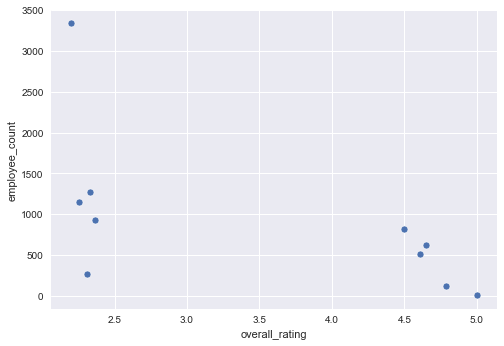

In [455]:
# Scatterplot to show the relationship between company size and overall rating
sns.scatterplot(x=df_merged['overall_rating'], y=df_merged['employee_count']);


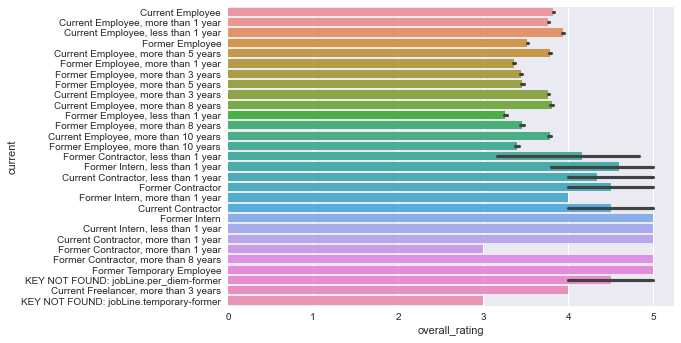

In [458]:
sns.barplot(x=gdr_df['overall_rating'], y=gdr_df['current']);